# Sharp Ratio & Frontier

In [78]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

ds_yahoo = 'yahoo'

last_year = datetime.datetime.now().year - 1
start = datetime.datetime.now().replace(year=last_year)
end = datetime.datetime.now()

## Portfolio Atual

In [79]:
tickers = ['ITUB4.SA', 'ABEV3.SA', 'USIM5.SA', 'PMAM3.SA', 'FLRY3.SA', 'PSSA3.SA', 'TIET4.SA']

itau = web.DataReader(tickers[0], ds_yahoo, start, end)
abev = web.DataReader(tickers[1], ds_yahoo, start, end)
usim = web.DataReader(tickers[2], ds_yahoo, start, end)
pmam = web.DataReader(tickers[3], ds_yahoo, start, end)
flry = web.DataReader(tickers[4], ds_yahoo, start, end)
pssa = web.DataReader(tickers[5], ds_yahoo, start, end)
tiet = web.DataReader(tickers[6], ds_yahoo, start, end)

In [80]:
# USIM5     TIET11   ITUB4   PMAM3  ABEV3   FLRY3   PSSA3
# 12.30%    12.13%   28.51%  3.72%  9.54%   6.57%   27.24%

## Normalizando o retorno diário de cada ativo do portfólio

In [81]:
for acao_df in (itau, abev, usim, pmam, flry, pssa, tiet):
    acao_df['Retorno Normalizado'] = acao_df['Adj Close'] / acao_df.iloc[0]['Adj Close']

## Alocando cada ativo com um peso específico

In [82]:
# [.20, .20, .05, .05, .20, .20, .1]
for acao_df, alocacao in zip((itau, abev, usim, pmam, flry, pssa, tiet), [.2851, .0954, .1230, .0372, .0657, .2724, .1213]):
    acao_df['Alocacao'] = acao_df['Retorno Normalizado'] * alocacao

## Posição de cada ativo no portfólio

In [83]:
for acao_df in (itau, abev, usim, pmam, flry, pssa, tiet):
    acao_df['Posicao'] = acao_df['Alocacao'] * 10000

In [84]:
todas_posicoes = [itau['Posicao'], abev['Posicao'], usim['Posicao'],
                  pmam['Posicao'], flry['Posicao'], pssa['Posicao'], tiet['Posicao']]

# DF que terá colunas adicionadas como Total e Retorno Diário
portfolio_posicao = pd.concat(todas_posicoes, axis=1)

# DF que terá apenas as ações com o Adj Close column
portfolio_acoes = pd.concat(todas_posicoes, axis=1)

In [85]:
portfolio_posicao.columns = ['ITUB', 'ABEV', 'USIM', 'PMAM', 'FLRY', 'PSSA', 'TIET']
portfolio_acoes.columns = ['ITUB', 'ABEV', 'USIM', 'PMAM', 'FLRY', 'PSSA', 'TIET']

## Desempenho da carteira

In [86]:
portfolio_posicao['Total'] = portfolio_posicao.sum(axis=1)

In [87]:
print('Investimento inicial:')
print(portfolio_posicao['Total'][0])
print('Investimento final:')
print(round(portfolio_posicao['Total'][-1], 2))

Investimento inicial:
10001.0
Investimento final:
13117.33


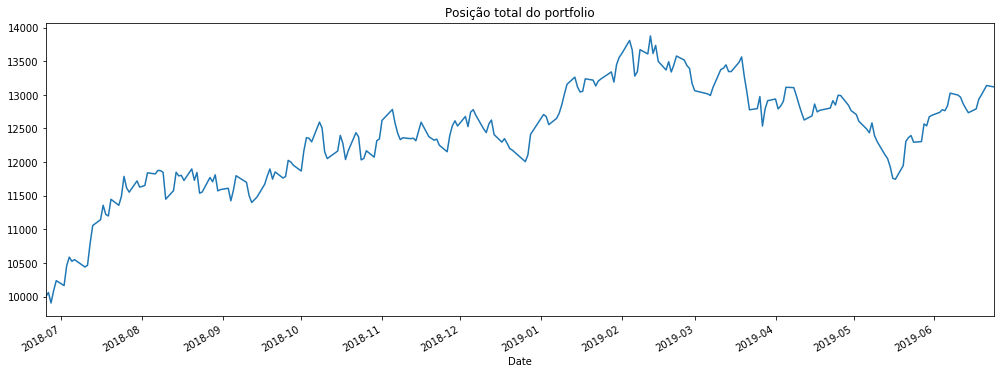

In [88]:
portfolio_posicao['Total'].plot(figsize=(17,6))
plt.title('Posição total do portfolio');

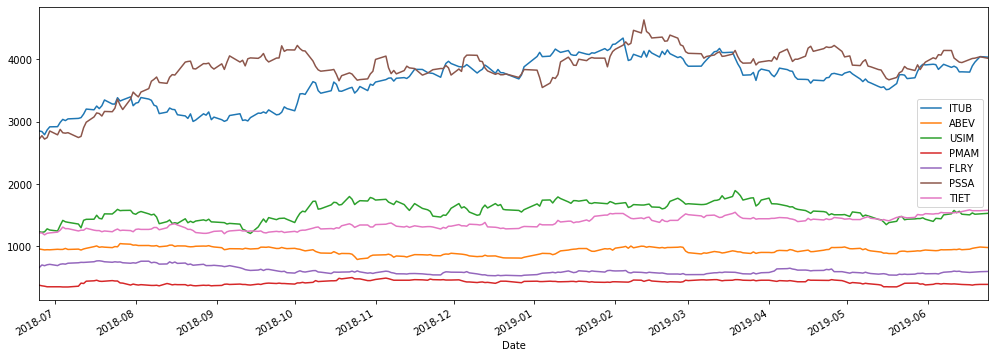

In [89]:
portfolio_acoes.plot(figsize=(17,6));

## Desempenho da Carteira Normalizada

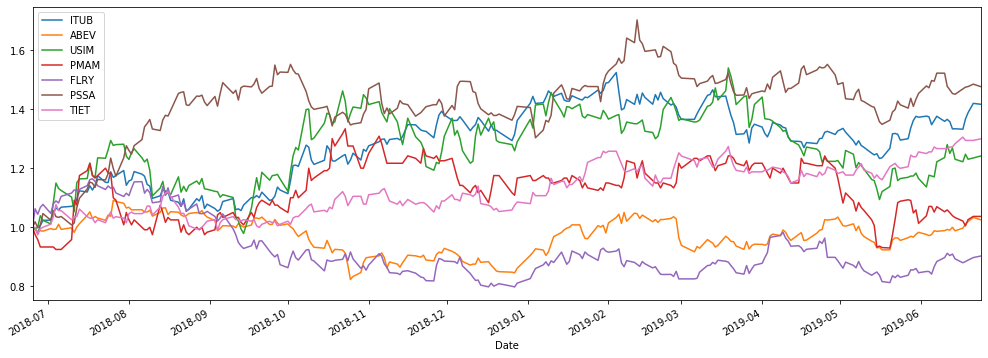

In [90]:
portfolio_normalizado = portfolio_acoes / portfolio_acoes.iloc[0]
portfolio_normalizado.plot(figsize=(17,6));

## Retorno diário da carteira

In [91]:
portfolio_posicao['Retorno Diario'] = portfolio_posicao['Total'].pct_change(1)

In [92]:
# Média de retorno diário
round(portfolio_posicao['Retorno Diario'].mean() * 100, 3)

0.119

In [93]:
# Desvio Padrão do retorno diário
portfolio_posicao['Retorno Diario'].std()

0.012479954356307058

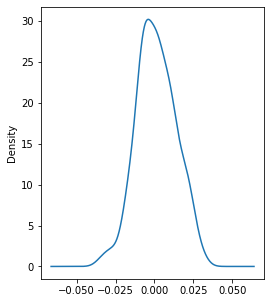

In [94]:
# Gráfico de densidade
portfolio_posicao['Retorno Diario'].plot(kind='kde', figsize=(4,5));

## Retorno Total da Carteira

In [95]:
retorno_total_acumulado = 100 * (portfolio_posicao['Total'][-1] / portfolio_posicao['Total'][0] - 1)
round_ret = round(retorno_total_acumulado, 3)
print('Essa carteira rendeu {} %'.format(round_ret))

Essa carteira rendeu 31.16 %


In [96]:
sharpe_ratio = (portfolio_posicao['Retorno Diario'].mean()) / portfolio_posicao['Retorno Diario'].std()
sharpe_ratio

0.0953348001378663

In [97]:
sharpe_ratio_ano = (245 ** 0.5) * sharpe_ratio
sharpe_ratio_ano

1.4922256561073777

## Retorno diário

In [98]:
retorno_diario = portfolio_acoes.pct_change(1)

## Gerando um único portfólio com posição atual

In [99]:
print(portfolio_acoes.columns)

# Gerando pesos aleatórios
print("Pesos Atuais")
pesos = [.2851, .0954, .1230, .0372, .0657, .2724, .1213]
print(pesos)

print("Rebalancear os pesos")
pesos = pesos / np.sum(pesos)
print(pesos)

# Retorno esperado
print("Retorno esperado")
ret_esp = np.sum( (retorno_diario.mean() * pesos) * 245 )
print(ret_esp)

# Volatilidade esperada
print("Volatilidade esperada")
vol_esp = np.sqrt( np.dot( pesos.T, np.dot( retorno_diario.cov() * 245, pesos ) ) )
print(vol_esp)

# Taxa de Sharpe
print("Sharpe Ratio")
sharpe = (ret_esp - 0.065) / vol_esp
print(sharpe)


Index(['ITUB', 'ABEV', 'USIM', 'PMAM', 'FLRY', 'PSSA', 'TIET'], dtype='object')
Pesos Atuais
[0.2851, 0.0954, 0.123, 0.0372, 0.0657, 0.2724, 0.1213]
Rebalancear os pesos
[0.28507149 0.09539046 0.1229877  0.03719628 0.06569343 0.27237276
 0.12128787]
Retorno esperado
0.31116558048908854
Volatilidade esperada
0.19354801814217013
Sharpe Ratio
1.271857923692447


## Gerando milhares de portfólios

In [100]:
num_portfolios = 10000
pesos_arr = np.zeros((num_portfolios, len(portfolio_acoes.columns)))
ret_esp_arr = np.zeros(num_portfolios)
vol_esp_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for ind in range(num_portfolios):

    # Pesos aleatórios
    pesos = np.array(np.random.random(7))
    pesos = pesos / np.sum(pesos)
    pesos_arr[ind,:] = pesos

    # Retorno esperado
    ret_esp_arr[ind] = np.sum( (retorno_diario.mean() * pesos) * 245 )

    # Volatilidade esperada
    vol_esp_arr[ind] = np.sqrt( np.dot( pesos.T, np.dot( retorno_diario.cov() * 245, pesos ) ) )

    # Taxa de Sharpe
    sharpe_arr[ind] = (ret_esp_arr[ind] - 0.065) / vol_esp_arr[ind]

pesos_arr[sharpe_arr.argmax(),:]

array([0.20399198, 0.00928462, 0.00713269, 0.0528689 , 0.00840184,
       0.41798724, 0.30033273])

In [101]:
sharpe_arr.max()

1.5502419465816233

In [102]:
sharpe_arr.argmax()

8240

In [103]:
pesos_arr[sharpe_arr.argmax(),:]

array([0.20399198, 0.00928462, 0.00713269, 0.0528689 , 0.00840184,
       0.41798724, 0.30033273])